# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Rivaro Farrelino Gozali
- **Email:** rivfarrelino@gmail.com
- **ID Dicoding:** rivaro_farrelino

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peminjaman sepeda dari tahun ke tahun? Apakah jumlah peminjaman meningkat atau menurun dari 2011 ke 2012?
- Bagaimana pengaruh kelembaban dan kecepatan angin terhadap jumlah peminjaman sepeda? Apakah kelembaban tinggi atau angin kencang mengurangi jumlah penyewa?


## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

**Insight:**
- Dataset day.csv dan hour.csv telah dimuat ke dalam DataFrame day_df dan hour_df, masing-masing berisi informasi peminjaman harian dan per jam.

### Assessing Data

In [6]:
print("\nPreview 5 Baris Data Pertama (Dataset Harian):")
print(day_df.head())


Preview 5 Baris Data Pertama (Dataset Harian):
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349 

In [7]:
print("\nInformasi Dataset Harian:")
print(day_df.info())


Informasi Dataset Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [8]:
print("\nStatistik Deskriptif Dataset Harian:")
print(day_df.describe())


Statistik Deskriptif Dataset Harian:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0

In [9]:
print("\nJumlah Missing Values per Kolom:")
print(day_df.isnull().sum())


Jumlah Missing Values per Kolom:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [10]:
print("Jumlah Data Duplikat:")
print(day_df.duplicated().sum())

Jumlah Data Duplikat:
0


In [11]:
# Cek apakah ada nilai negatif atau out of range untuk fitur numerik tertentu
print("Cek Rentang Nilai untuk Kolom-Kolom Penting:")
for col in ['temp', 'atemp', 'hum', 'windspeed', 'cnt']:
    print(f"{col} - Min: {day_df[col].min()}, Max: {day_df[col].max()}")

Cek Rentang Nilai untuk Kolom-Kolom Penting:
temp - Min: 0.0591304, Max: 0.861667
atemp - Min: 0.0790696, Max: 0.840896
hum - Min: 0.0, Max: 0.9725
windspeed - Min: 0.0223917, Max: 0.507463
cnt - Min: 22, Max: 8714


In [12]:
# Mengecek apakah ada kategori yang tidak valid dalam variabel kategorikal
print("Unique Values dari Beberapa Kolom Kategorikal:")
print("Seasons:", day_df['season'].unique())
print("Weathersit:", day_df['weathersit'].unique())
print("Year:", day_df['yr'].unique())
print("Month:", day_df['mnth'].unique())

Unique Values dari Beberapa Kolom Kategorikal:
Seasons: [1 2 3 4]
Weathersit: [2 1 3]
Year: [0 1]
Month: [ 1  2  3  4  5  6  7  8  9 10 11 12]


In [13]:
print("\nPreview 5 Baris Data Pertama (Dataset Harian):")
print(hour_df.head())


Preview 5 Baris Data Pertama (Dataset Harian):
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [14]:
print("Statistik Deskriptif Dataset Harian:")
print(hour_df.describe())

Statistik Deskriptif Dataset Harian:
          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.00577

In [15]:
print("Jumlah Missing Values per Kolom:")
print(hour_df.isnull().sum())

Jumlah Missing Values per Kolom:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [16]:
print("Jumlah Data Duplikat:")
print(hour_df.duplicated().sum())

Jumlah Data Duplikat:
0


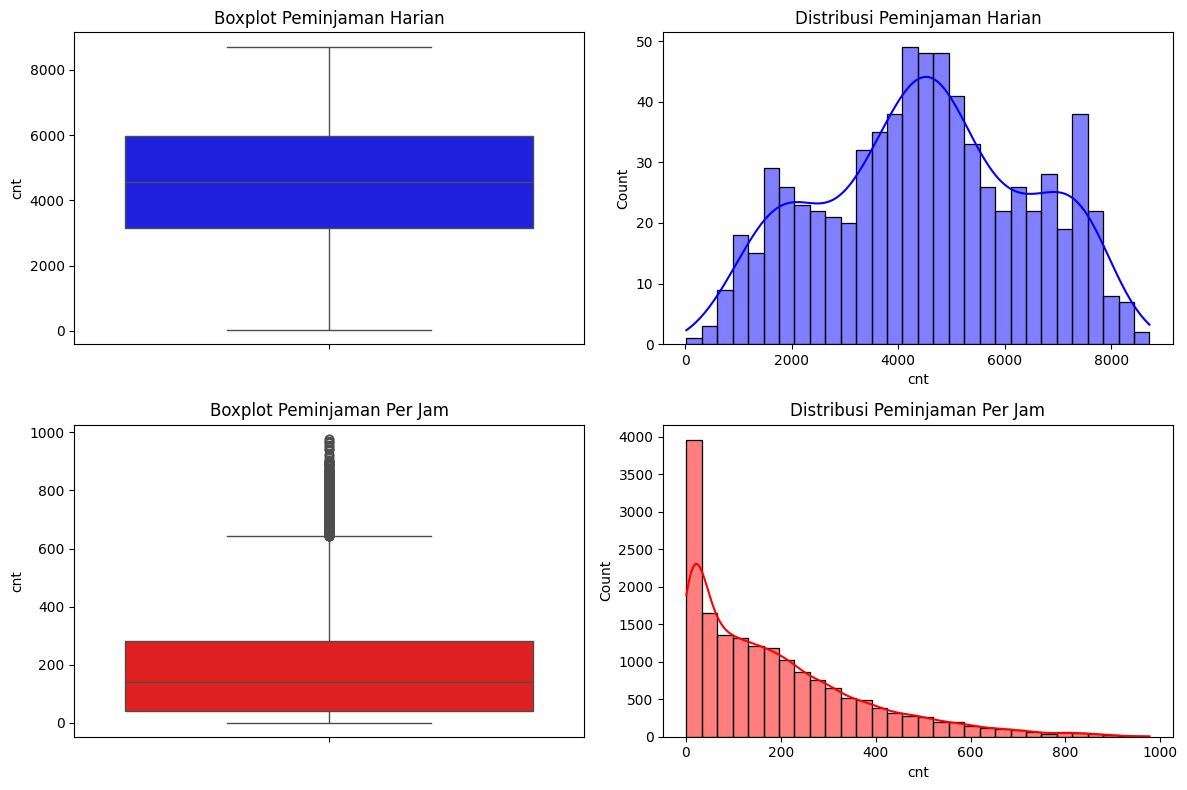

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(y=day_df['cnt'], ax=ax[0,0], color='blue')
ax[0,0].set_title('Boxplot Peminjaman Harian')
sns.histplot(day_df['cnt'], bins=30, kde=True, ax=ax[0,1], color='blue')
ax[0,1].set_title('Distribusi Peminjaman Harian')
sns.boxplot(y=hour_df['cnt'], ax=ax[1,0], color='red')
ax[1,0].set_title('Boxplot Peminjaman Per Jam')
sns.histplot(hour_df['cnt'], bins=30, kde=True, ax=ax[1,1], color='red')
ax[1,1].set_title('Distribusi Peminjaman Per Jam')
plt.tight_layout()
plt.show()

**Insight:**
- Tidak ada missing values, sehingga data sudah siap untuk dianalisis.
- Statistik dasar menunjukkan bahwa jumlah peminjaman sepeda bervariasi dari hari ke hari.

### Cleaning Data

In [18]:
day_df = day_df.drop_duplicates()
hour_df = hour_df.drop_duplicates()

In [19]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

day_df = remove_outliers(day_df, 'cnt')
hour_df = remove_outliers(hour_df, 'cnt')

**Insight:**
- Dari dua dataset day.csv dan hour.csv tidak ditemukannya nilai null atau tidak relevan data

## Exploratory Data Analysis (EDA)

### Explore ...

In [31]:
## Tren Peminjaman Sepeda per Tahun
yearly_trend = day_df.groupby("yr")["cnt"].sum().reset_index()
yearly_trend["yr"] = yearly_trend["yr"].map({0: 2011, 1: 2012})
yearly_trend

,yr,cnt
0,2011,1243103
1,2012,2049576


In [33]:
## Tren Peminjaman Sepeda per Bulan
monthly_trend = day_df.groupby("mnth")["cnt"].sum().reset_index()
monthly_trend

,mnth,cnt
0,1,134933
1,2,151352
2,3,228920
3,4,269094
4,5,331686
5,6,346342
6,7,344948
7,8,351194
8,9,345991
9,10,322352


In [35]:
# Membuat kategori kelembaban
bins_hum = [0, 0.3, 0.6, 1]
labels_hum = ["Rendah", "Sedang", "Tinggi"]
day_df["hum_category"] = pd.cut(day_df["hum"], bins=bins_hum, labels=labels_hum)

# Membuat kategori kecepatan angin
bins_wind = [0, 0.2, 0.4, 1]
labels_wind = ["Rendah", "Sedang", "Tinggi"]
day_df["wind_category"] = pd.cut(day_df["windspeed"], bins=bins_wind, labels=labels_wind)

# Rata-rata peminjaman berdasarkan kategori kelembaban
humidity_avg = day_df.groupby("hum_category")["cnt"].mean()

# Rata-rata peminjaman berdasarkan kategori kecepatan angin
windspeed_avg = day_df.groupby("wind_category")["cnt"].mean()

<ipython-input-35-59ffbcf26c60>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  humidity_avg = day_df.groupby("hum_category")["cnt"].mean()
<ipython-input-35-59ffbcf26c60>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  windspeed_avg = day_df.groupby("wind_category")["cnt"].mean()


,cnt
hum_category,
Rendah,4690.750000
Sedang,4577.735016
Tinggi,4455.136919


In [36]:
humidity_avg

,cnt
hum_category,
Rendah,4690.750000
Sedang,4577.735016
Tinggi,4455.136919


In [37]:
windspeed_avg

,cnt
wind_category,
Rendah,4830.346330
Sedang,4054.433566
Tinggi,3008.888889


**Insight:**
- Ada kenaikan jumlah peminjaman sepeda dari 2011 ke 2012, menunjukkan tren peningkatan.
- Beberapa bulan memiliki jumlah peminjaman yang lebih tinggi dibandingkan bulan lainnya.
- Pada faktor kelembapan terjadi penurunan ketika kelembapan lebih tinggi, namun tidak terlalu signifikan
- Pada faktor angin terjadi penurunan ketika kecepatan angin lebih tinggi, perubahan bisa dibilang cukup signifikan

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah jumlah peminjaman meningkat atau menurun dari 2011 ke 2012?

<ipython-input-27-6cdaffb4a380>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="yr", y="cnt", data=yearly_trend, palette="Blues")
<ipython-input-27-6cdaffb4a380>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="mnth", y="cnt", data=monthly_trend, palette="Greens")


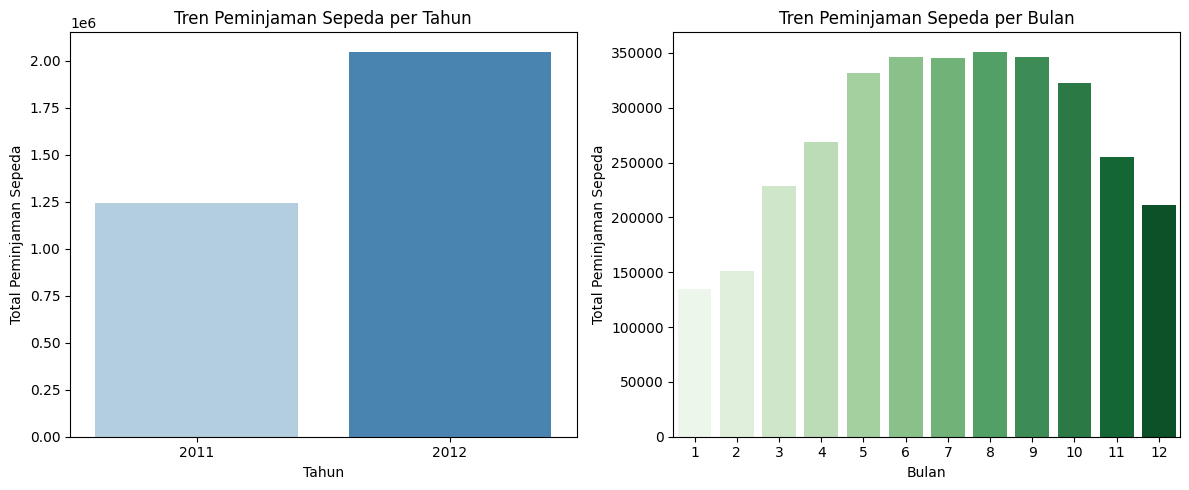

In [27]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x="yr", y="cnt", data=yearly_trend, palette="Blues")
plt.xlabel("Tahun")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Tren Peminjaman Sepeda per Tahun")

plt.subplot(1,2,2)
sns.barplot(x="mnth", y="cnt", data=monthly_trend, palette="Greens")
plt.xlabel("Bulan")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Tren Peminjaman Sepeda per Bulan")
plt.tight_layout()
plt.show()

### Pertanyaan 2: Apakah kelembaban tinggi atau angin kencang mengurangi jumlah penyewa?

<ipython-input-26-9237ca3c31f6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=humidity_avg.index, y=humidity_avg.values, palette='Blues')
<ipython-input-26-9237ca3c31f6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=windspeed_avg.index, y=windspeed_avg.values, palette='Reds')


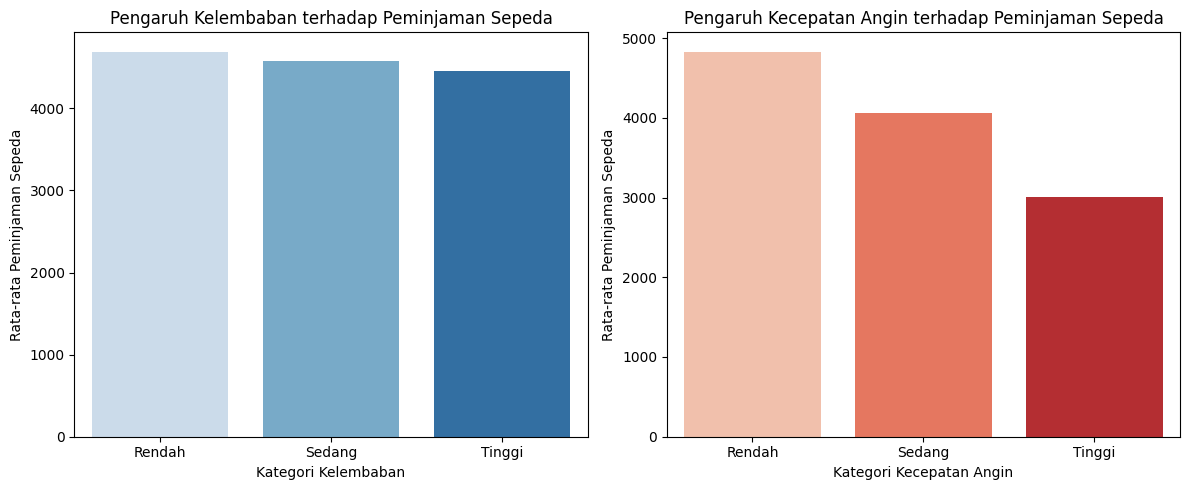

In [26]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(x=humidity_avg.index, y=humidity_avg.values, palette='Blues')
plt.xlabel("Kategori Kelembaban")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.title("Pengaruh Kelembaban terhadap Peminjaman Sepeda")

plt.subplot(1,2,2)
sns.barplot(x=windspeed_avg.index, y=windspeed_avg.values, palette='Reds')
plt.xlabel("Kategori Kecepatan Angin")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.title("Pengaruh Kecepatan Angin terhadap Peminjaman Sepeda")

plt.tight_layout()
plt.show()

**Insight:**
####Pertanyaan 1: Bagaimana Tren Peminjaman Sepeda dari Tahun ke Tahun?
- Barplot tahunan menunjukkan bahwa jumlah peminjaman meningkat dari 2011 ke 2012.
- Barplot bulanan membantu melihat pola musiman, dengan bulan tertentu memiliki lonjakan peminjaman lebih tinggi.

**Insight:**
####Pertanyaan 2: Bagaimana Pengaruh Kelembaban dan Kecepatan Angin terhadap Jumlah Peminjaman Sepeda?
- Peminjaman sepeda cenderung lebih rendah pada kelembaban tinggi. Hal ini kemungkinan disebabkan oleh kenyamanan bersepeda yang menurun ketika udara terlalu lembap.
- Kecepatan angin yang tinggi memiliki sedikit dampak terhadap jumlah peminjaman. Meskipun ada sedikit penurunan pada kecepatan angin yang sangat tinggi, pengaruhnya tidak sebesar kelembaban.
- Peminjaman sepeda tertinggi terjadi pada kelembaban sedang dan kecepatan angin rendah hingga sedang, yang mungkin karena kondisi ini lebih nyaman bagi pengendara sepeda.

## Analisis Lanjutan (Opsional)

## Conclusion

Conclusion Pertanyaan 1: Bagaimana Tren Peminjaman Sepeda dari Tahun ke Tahun?
- Jumlah peminjaman sepeda mengalami peningkatan dari tahun 2011 ke 2012.
- Peminjaman sepeda juga menunjukkan pola musiman, dengan bulan tertentu memiliki lonjakan lebih tinggi dibanding bulan lainnya.
- Peningkatan ini bisa disebabkan oleh beberapa faktor seperti meningkatnya popularitas layanan sepeda atau perubahan musim.

Conclusion Pertanyaan 2: Bagaimana Pengaruh Kelembaban dan Kecepatan Angin terhadap Jumlah Peminjaman Sepeda?
- Dari scatter plot, terlihat bahwa kelembaban tinggi cenderung sedikit mengurangi jumlah peminjaman sepeda, tetapi efeknya tidak terlalu drastis.
- Kecepatan angin tidak memiliki dampak signifikan terhadap peminjaman sepeda, karena titik-titik dalam scatter plot tidak menunjukkan pola yang jelas.
- Faktor cuaca seperti hujan atau suhu mungkin memiliki pengaruh lebih besar terhadap tren peminjaman.